In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test)=mnist.load_data()
X_train, X_test = X_train/255.0, X_test/255.0
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [5]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics='accuracy',
)

In [6]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2943 - accuracy: 0.9143 - val_loss: 0.1378 - val_accuracy: 0.9580
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1425 - accuracy: 0.9581 - val_loss: 0.1023 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1088 - accuracy: 0.9665 - val_loss: 0.0867 - val_accuracy: 0.9719
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0874 - accuracy: 0.9731 - val_loss: 0.0764 - val_accuracy: 0.9758
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0747 - accuracy: 0.9764 - val_loss: 0.0775 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.0730 - val_accuracy: 0.9769
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0599 - accuracy: 0.9804 - val_loss: 0.0702 - val_accuracy

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 967    1    2    1    1    0    3    1    2    2]
 [   0 1125    2    1    0    0    2    1    4    0]
 [   3    2 1010    2    1    1    2    6    5    0]
 [   0    0    6  983    0    9    0    4    2    6]
 [   0    0    4    1  959    0    4    2    1   11]
 [   2    0    0    3    1  880    2    1    3    0]
 [   4    3    1    1    4    4  937    0    3    1]
 [   2    3   11    3    0    0    0 1002    1    6]
 [   1    1    3    4    5    3    1    3  950    3]
 [   0    3    0    3   10    5    1    7    1  979]]


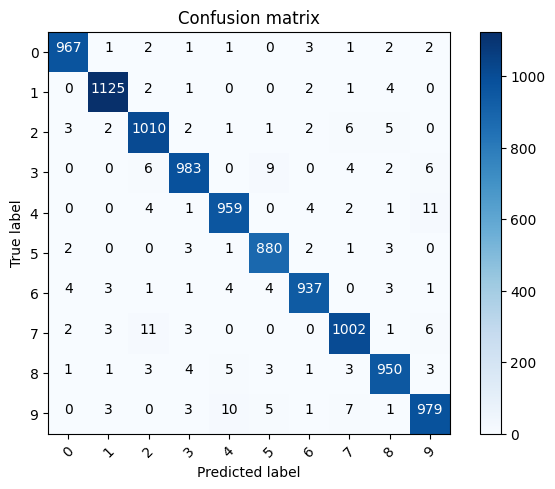

In [7]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


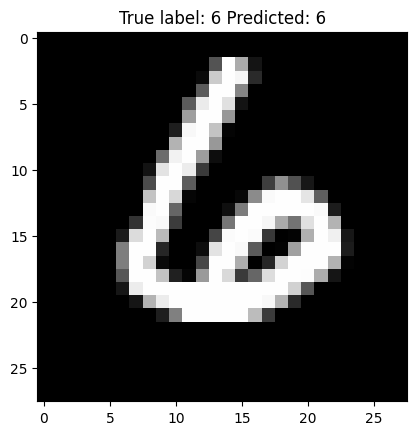

In [8]:
# Show some misclassified examples
misclassified_idx = np.where(p_test == y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));